<a href="https://colab.research.google.com/github/ramigalv60/Inteligencias-Artificiales-TIC/blob/main/Clase-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Investigar y seleccionar un dataset que cumpla con tener entre 1000 y 10.000 muestras, 5 o más atributos numéricos y al menos un atributo categórico (Recomendación: seleccionar un atributo a predecir binario). De encontrar algún dataset sin atributos categóricos, ¿Como se podría generar uno binario a partir de los atributos numéricos? Se recomienda utilizar Kaggle para la búsqueda del dataset. Antes de avanzar con el trabajo práctico, corroborar el dataset en clase.

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree

df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#2. Realizar un análisis exploratorio de los datos. Se recomienda utilizar gráficos para visualizar la distribución de los datos y la correlación entre los atributos. Se recomienda utilizar la librería seaborn para realizar los gráficos.

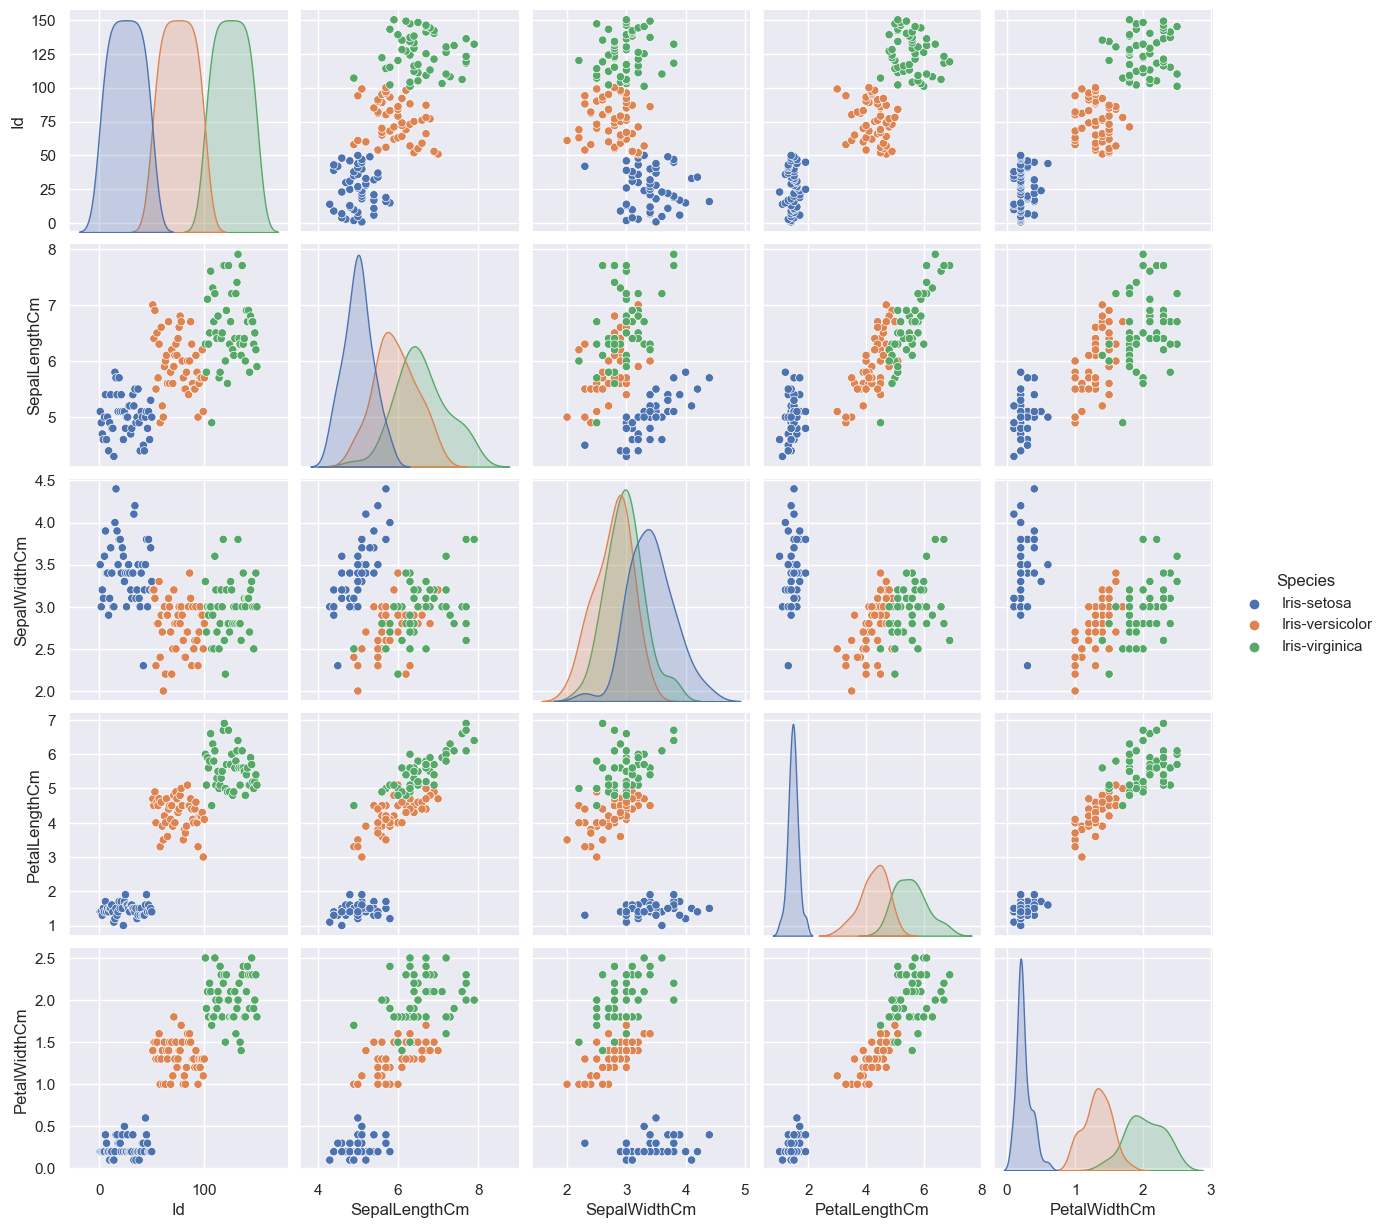

In [48]:
sns.set_theme(style="darkgrid")
sns.pairplot(df, hue="Species")
plt.show()

#3. Como resultado del análisis exploratorio, seleccionar un atributo categórico y un atributo numérico para realizar un modelo de clasificación. Se recomienda utilizar la función LabelEncoder de SciKit-Learn para convertir el atributo categórico a numérico.

In [3]:
# Encode categorical attribute
le = LabelEncoder()
X = df['Species']
X_encoded = le.fit_transform(X)
y = df['PetalWidthCm']
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y)

#4. Realizar una partición de los datos en conjuntos de entrenamiento y test. La proporción con la cual hacen esta partición es libre. Se recomienda utilizar la función train_test_split de SciKit-Learn.

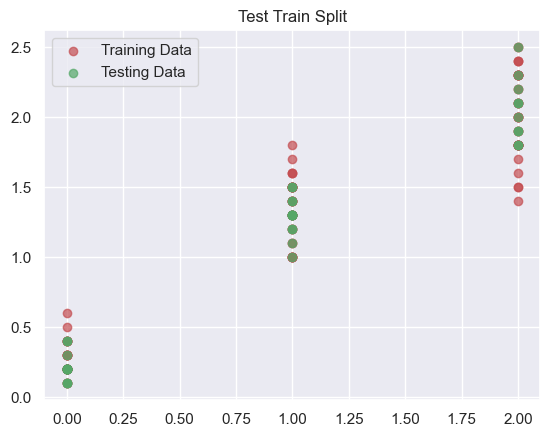

In [65]:
plt.scatter(X_train, y_train, label='Training Data', color='r', alpha=.7)
plt.scatter(X_test, y_test, label='Testing Data', color='g', alpha=.7)
plt.legend()
plt.title('Test Train Split')
plt.show()

#5. Para el atributo numérico a predecir seleccionado:

Realizar un modelo de regresión lineal utilizando la clase LinearRegression de SciKit-Learn.
Realizar un modelo de Árbol de Decisión utilizando la clase DecisionTreeRegressor de SciKit-Learn. Seleccionar hiperparámetros que les parezca mejoren el modelo.

Responder: ¿Que formas tienen de evaluar los resultados de cada árbol de decisión? ¿Como eligen "el mejor árbol"? ¿Como se comparan los resultados de los modelos de regresión lineal y de árbol de decisión?

Sugerencia: Aprovechar los conceptos de validación y de validación cruzada para evaluar los modelos. Pueden utilizar la función cross_val_score de SciKit-Learn para evaluar los modelos.

Se recomienda utilizar la función cross_val_score de SciKit-Learn para evaluar los modelos.

In [4]:
LR = LinearRegression().fit(X_train.reshape(-1, 1), y_train.values)


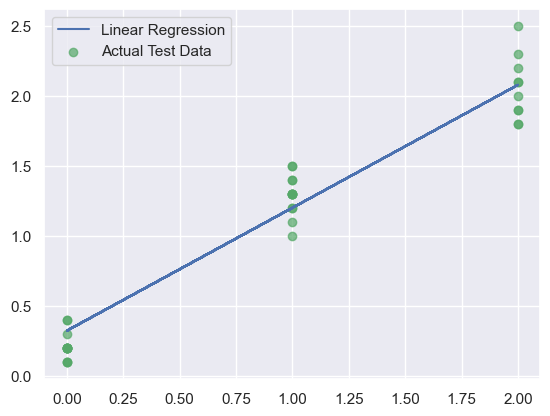

In [69]:
predicted = LR.predict(X_test.reshape(-1, 1))
plt.plot(X_test, predicted, label='Linear Regression', color='b')
plt.scatter(X_test, y_test, label='Actual Test Data', color='g', alpha=.7)
plt.legend()
plt.show()

In [10]:
LR.score(X_test.reshape(-1, 1), y_test.values)

0.9167795383239925

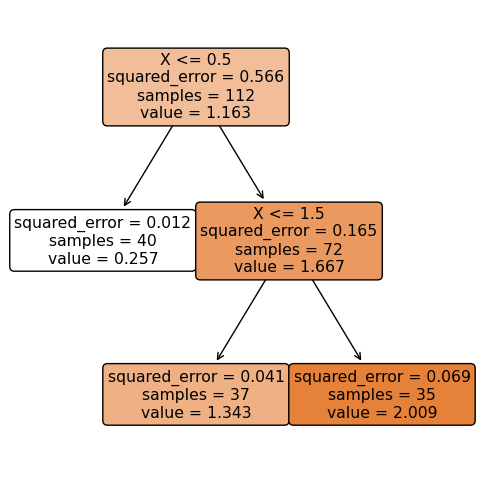

In [19]:
tree_regressor = DecisionTreeRegressor(max_depth=5, random_state=42).fit(X_train.reshape(-1, 1), y_train.values)
y_pred_tree = tree_regressor.predict(X_test.reshape(-1, 1))

plt.figure(figsize=(6, 6))
plot_tree(tree_regressor, filled=True, rounded=True, feature_names=['X'])
plt.show()

#6. Para el atributo categórico a predecir seleccionado
Realizar un modelo de clasificación utilizando la clase LogisticRegression de SciKit-Learn.
Realizar un modelo de clasificación utilizando la clase DecisionTreeClassifier de SciKit-Learn.

Responder: ¿Que formas tienen de evaluar los resultados de cada árbol de decisión? ¿Como eligen "el mejor árbol"? ¿Como se comparan los resultados de los modelos de regresión lineal y de árbol de decisión?

a

a

#7. Comparar distintos métodos de validación cruzada. ¿Que ventajas y desventajas tiene cada uno?

a

#8. Escribir una conclusión sobre el trabajo realizado.

a